In [1]:
import numpy as np
from scipy import stats as stats
import matplotlib.pyplot as plt
from scipy.signal import correlate
import time

Données du signal_simple:

In [2]:
""" Valeurs"""

l,step = np.linspace(600,1400,1000, retstep = True)
    
l0 = 656.3
z = np.random.uniform(0.0,1.0)
obs = z*l0 + l0
    
dev = 0.01*obs
    
""" DONNEES """

ysig = 20*stats.norm.pdf(l,obs,dev)
bruit = np.random.normal(0,1,1000)
data = ysig + bruit

""" MODELS: Du signal et du bruit """

lmod,step = np.linspace(0,60*step,60, retstep = True)
ymodel = stats.norm.pdf(lmod,(step*60/2),8)

bruitmod = np.random.normal(0,1,1000)
    

Traitement du signal simple par notre code initial:

In [3]:
start = time.time()  


def cross(ymodel,ysig):
        sizemod = np.size(ymodel)
        sizesig = np.size(ysig)
        
        prod = []
    
        for i in range(sizesig-sizemod):
            p = np.dot(ymodel,ysig[i:(i+sizemod)])
            prod.append(p)
        return prod
    

# Corrélations croisées modèle/données
prodat = np.zeros(940)
for i in range(1000):
    prodat += cross(ymodel,data)
prodat /= 1000
# Corrélations croisées modèle/bruit
prodbruit = cross(ymodel,bruitmod)
    
devbr = np.std(prodbruit)
SNR = prodat/devbr


end = time.time()
t = end - start
print(t)

2.7253613471984863


Traitement du signal simple par la fonction correlate

In [4]:
start_2 = time.time()

prodat_2 = correlate(data, ymodel)
    
# Corrélations croisées modèle/bruit
prodbruit_2 = correlate(bruitmod, ymodel)
    
devbr_2 = np.std(prodbruit_2)
SNR_2 = prodat_2/devbr_2

end_2 = time.time()
t_2 = end_2 - start_2
print(t_2)

0.0009684562683105469


Text(0.5, 1.0, 'Signal sur bruit')

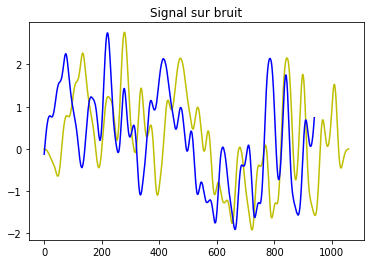

In [5]:
plt.plot(SNR_2, 'y')
plt.plot(SNR, 'b')
plt.title("Signal sur bruit")
#signal tronqué pour nous donc décalé !



A ne pas exécuter tout de suite ça prend du temps on le fera à la fin:
(entourer la fonction voulue avec start/stop)

In [ ]:
from codecarbon import EmissionsTracker

tracker = EmissionsTracker()
tracker.start()

tracker.stop()